In [839]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [840]:
df=pd.read_csv(r"C:\Users\OM RAJ PANDEY\Desktop\Micro-Credit-Project--1-\Micro Credit Project\Data file.csv")

In [841]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# Data Cleaning

In [842]:
# number of rows and columns
df.shape

(209593, 37)

In [843]:
#number of missing values in each column
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [845]:
df.drop(columns=['msisdn','Unnamed: 0'],axis=1)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


# Exploratory Data Analysis

In [846]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
df['pcircle']=le1.fit_transform(df['pcircle'])
le2=LabelEncoder()
df['pdate']=le2.fit_transform(df['pdate'])

In [847]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr30'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'rental30'}>],
       [<AxesSubplot:title={'center':'rental90'}>,
        <AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'fr_ma_rech30'}>],
       [<AxesSubplot:title={'center':'sumamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianmarechprebal30'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rec

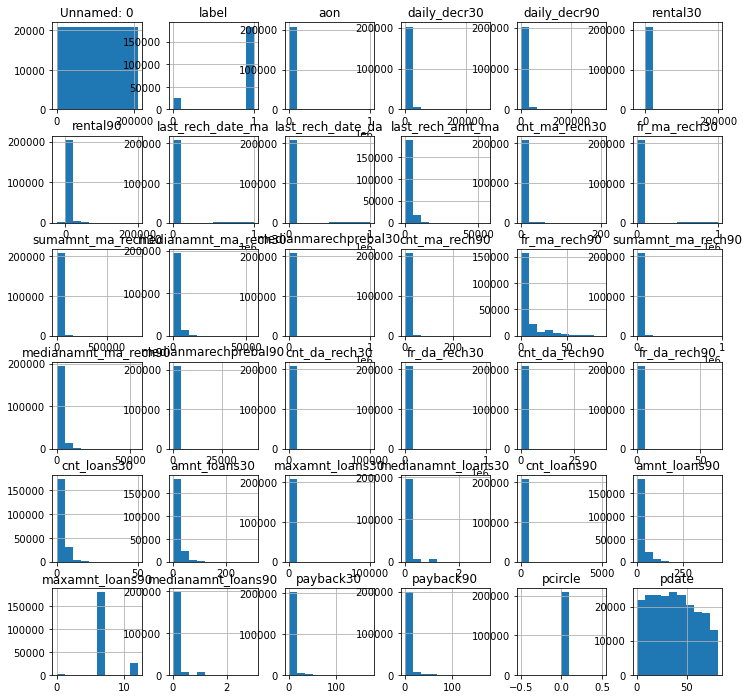

In [848]:
df.hist(figsize=(12,12),layout=(6,6),sharex=False)

In [849]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

# BOX PLOT

Unnamed: 0                 AxesSubplot(0.125,0.772143;0.110714x0.107857)
label                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
aon                     AxesSubplot(0.390714,0.772143;0.110714x0.107857)
daily_decr30            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
daily_decr90            AxesSubplot(0.656429,0.772143;0.110714x0.107857)
rental30                AxesSubplot(0.789286,0.772143;0.110714x0.107857)
rental90                   AxesSubplot(0.125,0.642714;0.110714x0.107857)
last_rech_date_ma       AxesSubplot(0.257857,0.642714;0.110714x0.107857)
last_rech_date_da       AxesSubplot(0.390714,0.642714;0.110714x0.107857)
last_rech_amt_ma        AxesSubplot(0.523571,0.642714;0.110714x0.107857)
cnt_ma_rech30           AxesSubplot(0.656429,0.642714;0.110714x0.107857)
fr_ma_rech30            AxesSubplot(0.789286,0.642714;0.110714x0.107857)
sumamnt_ma_rech30          AxesSubplot(0.125,0.513286;0.110714x0.107857)
medianamnt_ma_rech30    AxesSubplot(0.257857,0.5132

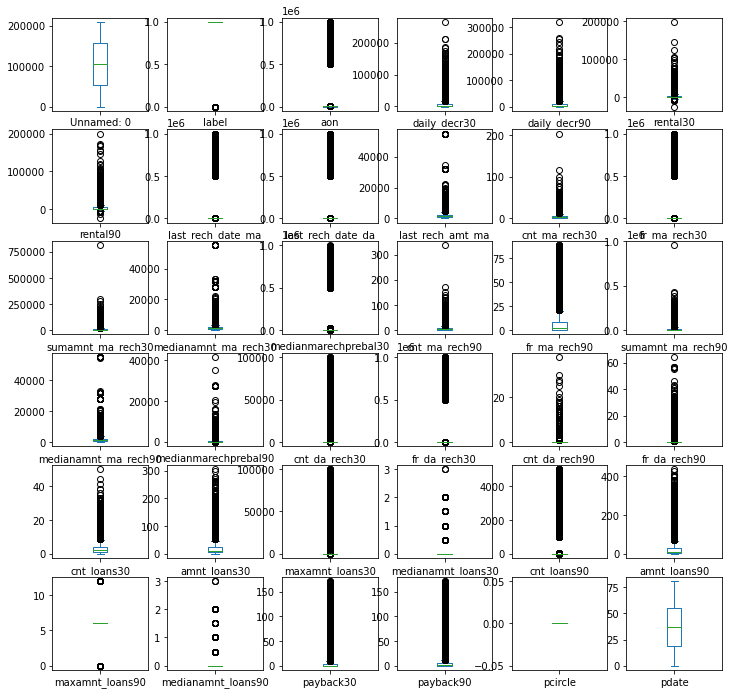

In [850]:
df.plot(kind='box',figsize=(12,12),layout=(6,6),sharex=False,subplots=True)

In [851]:
# Identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import sklearn


In [852]:
df.describe()
    

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,0.0,37.512646
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.0,21.989630
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.0,19.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,0.0,37.000000
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,0.0,55.000000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,0.0,81.000000


In [853]:
q1=df.aon.quantile(0.25)
q3=df.aon.quantile(0.75)
q1,q3

(246.0, 982.0)

In [854]:
iqr=q3-q1
iqr

736.0

In [855]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-858.0, 2086.0)

In [856]:
df[(df.aon<lower_limit)|(df.aon>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
31,32,1,37891I90581,2171.000000,160.371000,160.371000,4110.48,4110.48,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,10.0,10.0,0,26
65,66,1,63268I91197,929670.835962,4130.729333,4151.880000,6139.79,6529.55,22.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,58
157,158,1,20891I88690,860950.168106,19.396000,19.396000,78.12,78.12,3.0,0.0,...,6.0,0.5,2.0,12,6,0.5,3.0,3.0,0,5
189,190,1,30511I89237,2093.000000,101.733333,101.733333,929.25,929.25,17.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,24
286,287,1,17348I90583,2282.000000,6809.000000,7572.950000,1642.88,1933.88,7.0,0.0,...,6.0,0.0,2.0,12,6,0.0,6.5,6.5,0,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209022,209023,1,13676I89239,504021.842848,3.026667,3.026667,567.36,567.36,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.0,0,3
209155,209156,1,78079I74177,959124.978632,13103.000000,17517.650000,12734.61,17410.82,16.0,0.0,...,0.0,0.0,2.0,12,6,0.0,0.0,4.0,0,69
209327,209328,1,20036I90580,803380.621830,18.821333,18.821333,98.24,98.24,5.0,0.0,...,6.0,0.0,3.0,18,6,0.0,2.0,2.0,0,7
209439,209440,0,78882I70782,581435.484230,2.666667,2.666667,10.00,10.00,0.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,4


In [857]:
df2=df[(df.aon>lower_limit)&(df.aon<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [858]:
q1=df.daily_decr30.quantile(0.25)
q3=df.daily_decr30.quantile(0.75)
q1,q3

(42.44, 7244.0)

In [859]:
iqr=q3-q1
iqr

7201.56

In [860]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-10759.9, 18046.34)

In [861]:
df[(df.daily_decr30<lower_limit)|(df.daily_decr30>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
36,37,1,41249I82731,1578.0,38740.076000,38935.57,4662.68,5416.68,1.0,0.0,...,12.0,0.0,15.0,108,12,0.0,2.000000,1.875000,0,55
55,56,1,93567I90843,319.0,23346.533333,23368.00,8960.17,13696.37,1.0,0.0,...,6.0,0.0,13.0,78,6,0.0,3.250000,7.461538,0,57
60,61,1,42023I90584,1065.0,28786.428000,28905.57,7038.67,6914.65,4.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,47
79,80,1,23396I82731,318.0,21792.240000,21826.80,11795.13,13025.69,2.0,0.0,...,12.0,0.0,6.0,48,12,0.0,4.800000,4.800000,0,45
84,85,1,98163I82731,104.0,18519.500000,18597.78,6702.35,10517.93,1.0,0.0,...,6.0,1.0,2.0,12,6,1.0,1.500000,1.500000,0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209575,209576,1,23627I70370,800.0,26581.000000,28916.39,4191.48,6785.92,1.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,6.000000,0,73
209578,209579,1,83229I89230,1256.0,30900.830000,45485.28,8438.77,14562.40,5.0,0.0,...,12.0,0.0,6.0,48,12,0.0,3.250000,3.800000,0,75
209580,209581,1,13819I82733,1365.0,18657.000000,24825.00,6314.34,12318.22,26.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.000000,0.000000,0,66
209581,209582,1,39326I91197,377.0,28785.000000,45515.00,3956.57,14753.13,2.0,0.0,...,12.0,0.0,10.0,72,12,0.0,2.666667,2.777778,0,76


In [862]:
df2=df[(df.daily_decr30>lower_limit)&(df.daily_decr30<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [863]:
q1=df.daily_decr90.quantile(0.25)
q3=df.daily_decr90.quantile(0.75)
q1,q3

(42.692, 7802.79000000001)

In [864]:
iqr=q3-q1
iqr

7760.09800000001

In [865]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-11597.455000000016, 19442.937000000027)

In [866]:
df[(df.daily_decr90<lower_limit)|(df.daily_decr90>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
36,37,1,41249I82731,1578.0,38740.076000,38935.57,4662.68,5416.68,1.0,0.0,...,12.0,0.0,15.0,108,12,0.0,2.000000,1.875000,0,55
55,56,1,93567I90843,319.0,23346.533333,23368.00,8960.17,13696.37,1.0,0.0,...,6.0,0.0,13.0,78,6,0.0,3.250000,7.461538,0,57
60,61,1,42023I90584,1065.0,28786.428000,28905.57,7038.67,6914.65,4.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,47
79,80,1,23396I82731,318.0,21792.240000,21826.80,11795.13,13025.69,2.0,0.0,...,12.0,0.0,6.0,48,12,0.0,4.800000,4.800000,0,45
114,115,1,48229I88690,1443.0,30376.000000,37204.42,7199.75,11131.96,2.0,0.0,...,6.0,0.0,13.0,78,6,0.0,2.375000,2.714286,0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209575,209576,1,23627I70370,800.0,26581.000000,28916.39,4191.48,6785.92,1.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,6.000000,0,73
209578,209579,1,83229I89230,1256.0,30900.830000,45485.28,8438.77,14562.40,5.0,0.0,...,12.0,0.0,6.0,48,12,0.0,3.250000,3.800000,0,75
209580,209581,1,13819I82733,1365.0,18657.000000,24825.00,6314.34,12318.22,26.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.000000,0.000000,0,66
209581,209582,1,39326I91197,377.0,28785.000000,45515.00,3956.57,14753.13,2.0,0.0,...,12.0,0.0,10.0,72,12,0.0,2.666667,2.777778,0,76


In [867]:
df2=df[(df.daily_decr90>lower_limit)&(df.daily_decr90<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [868]:
q1=df.rental30.quantile(0.25)
q3=df.rental30.quantile(0.75)
q1,q3

(280.42, 3356.94)

In [869]:
iqr=q3-q1
iqr

3076.52

In [870]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-4334.36, 7971.719999999999)

In [871]:
df[(df.rental30<lower_limit)|(df.rental30>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
27,28,0,49345I90842,871.0,505.600000,508.00,9276.68,10569.17,16.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,38
55,56,1,93567I90843,319.0,23346.533333,23368.00,8960.17,13696.37,1.0,0.0,...,6.0,0.0,13.0,78,6,0.0,3.250000,7.461538,0,57
67,68,1,49949I89234,1828.0,10865.094000,10932.63,11031.41,13497.17,1.0,0.0,...,12.0,0.0,8.0,60,12,0.0,4.250000,4.285714,0,45
79,80,1,23396I82731,318.0,21792.240000,21826.80,11795.13,13025.69,2.0,0.0,...,12.0,0.0,6.0,48,12,0.0,4.800000,4.800000,0,45
99,100,1,69691I90585,491.0,2522.173333,2541.80,11339.95,14729.55,13.0,0.0,...,6.0,0.0,4.0,24,6,0.0,0.000000,9.000000,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209560,209561,1,47093I95200,470.0,9363.000000,9447.23,16724.32,23324.06,2.0,0.0,...,6.0,0.0,9.0,54,6,0.0,8.200000,7.500000,0,62
209561,209562,1,76695I85328,374.0,12776.000000,19459.51,16416.14,25760.98,4.0,0.0,...,12.0,0.0,23.0,150,12,0.0,7.000000,2.347826,0,66
209573,209574,1,02497I89237,642.0,25235.000000,25347.75,14948.51,24240.28,1.0,0.0,...,12.0,0.0,12.0,90,12,0.0,5.615385,6.357143,0,75
209578,209579,1,83229I89230,1256.0,30900.830000,45485.28,8438.77,14562.40,5.0,0.0,...,12.0,0.0,6.0,48,12,0.0,3.250000,3.800000,0,75


In [872]:
df2=df[(df.rental30>lower_limit)&(df.rental30<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [873]:
q1=df.rental90.quantile(0.25)
q3=df.rental90.quantile(0.75)
q1,q3

(300.26, 4201.79)

In [874]:
iqr=q3-q1
iqr

3901.5299999999997

In [875]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-5552.035, 10054.085)

In [876]:
df[(df.rental90<lower_limit)|(df.rental90>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
27,28,0,49345I90842,871.0,505.600000,508.00,9276.68,10569.17,16.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,38
55,56,1,93567I90843,319.0,23346.533333,23368.00,8960.17,13696.37,1.0,0.0,...,6.0,0.0,13.0,78,6,0.0,3.250000,7.461538,0,57
67,68,1,49949I89234,1828.0,10865.094000,10932.63,11031.41,13497.17,1.0,0.0,...,12.0,0.0,8.0,60,12,0.0,4.250000,4.285714,0,45
79,80,1,23396I82731,318.0,21792.240000,21826.80,11795.13,13025.69,2.0,0.0,...,12.0,0.0,6.0,48,12,0.0,4.800000,4.800000,0,45
84,85,1,98163I82731,104.0,18519.500000,18597.78,6702.35,10517.93,1.0,0.0,...,6.0,1.0,2.0,12,6,1.0,1.500000,1.500000,0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209573,209574,1,02497I89237,642.0,25235.000000,25347.75,14948.51,24240.28,1.0,0.0,...,12.0,0.0,12.0,90,12,0.0,5.615385,6.357143,0,75
209578,209579,1,83229I89230,1256.0,30900.830000,45485.28,8438.77,14562.40,5.0,0.0,...,12.0,0.0,6.0,48,12,0.0,3.250000,3.800000,0,75
209580,209581,1,13819I82733,1365.0,18657.000000,24825.00,6314.34,12318.22,26.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.000000,0.000000,0,66
209581,209582,1,39326I91197,377.0,28785.000000,45515.00,3956.57,14753.13,2.0,0.0,...,12.0,0.0,10.0,72,12,0.0,2.666667,2.777778,0,76


In [877]:
df2=df[(df.rental90>lower_limit)&(df.rental90<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [878]:
q1=df.last_rech_date_ma.quantile(0.25)
q3=df.last_rech_date_ma.quantile(0.75)
q1,q3

(1.0, 7.0)

In [879]:
iqr=q3-q1
iqr

6.0

In [880]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-8.0, 16.0)

In [881]:
df[(df.last_rech_date_ma<lower_limit)|(df.last_rech_date_ma>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.000000,0.0,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,0,70
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.000000,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,0,5
11,12,0,82417I90848,82.0,65.166667,65.166667,326.20,326.20,17.000000,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,19
30,31,1,70130I90843,-42.0,8.864333,8.864333,780.71,780.71,780195.497093,0.0,...,6.0,1.0,1.0,6,6,1.0,0.0,0.0,0,6
48,49,1,03746I91197,406.0,8160.000000,9604.750000,599.66,689.66,19.000000,0.0,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209536,209537,1,94993I70785,427.0,5887.000000,5942.360000,0.00,0.00,64.000000,64.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,59
209537,209538,0,99643I70374,292.0,5.683333,15.500000,9653.51,10253.34,32.000000,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,48
209554,209555,0,49076I89233,744.0,1454.491667,1461.750000,559.73,655.28,31.000000,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,42
209572,209573,1,37836I89232,166.0,13503.197333,13561.960000,853.69,1299.73,21.000000,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,0,57


In [882]:
df2=df[(df.last_rech_date_ma>lower_limit)&(df.last_rech_date_ma<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,0,31
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [883]:
q1=df.last_rech_amt_ma.quantile(0.25)
q3=df.last_rech_amt_ma.quantile(0.75)
q1,q3

(770.0, 2309.0)

In [884]:
iqr=q3-q1
iqr

1539.0

In [885]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-1538.5, 4617.5)

In [886]:
df[(df.last_rech_amt_ma<lower_limit)|(df.last_rech_amt_ma>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,2,1,76462I70374,712.000000,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.0,0.00,0,70
6,7,1,96759I84459,545.000000,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.00,0,34
11,12,0,82417I90848,82.000000,65.166667,65.166667,326.20,326.20,17.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.00,0,19
37,38,1,01210I90840,725.000000,9740.000000,16337.040000,299.96,1457.22,15.0,63.0,...,12.0,1.0,4.0,30,12,0.5,7.5,19.75,0,74
49,50,1,55570I82737,445.000000,504.784000,504.784000,1869.56,1869.56,3.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.00,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209563,209564,1,12150I70780,574.000000,74.700000,74.700000,752.94,752.94,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.00,0,17
209572,209573,1,37836I89232,166.000000,13503.197333,13561.960000,853.69,1299.73,21.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.00,0,57
209576,209577,1,70448I82734,811881.372822,149.760000,149.760000,922.20,922.20,4.0,0.0,...,6.0,0.0,2.0,12,6,0.0,5.5,5.50,0,14
209580,209581,1,13819I82733,1365.000000,18657.000000,24825.000000,6314.34,12318.22,26.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.00,0,66


In [887]:
df2=df[(df.last_rech_amt_ma>lower_limit)&(df.last_rech_amt_ma<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209587,209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,...,12.0,1.0,3.0,24,12,1.0,0.000000,30.000000,0,62
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58


In [888]:
q1=df.cnt_ma_rech30.quantile(0.25)
q3=df.cnt_ma_rech30.quantile(0.75)
q1,q3

(1.0, 5.0)

In [889]:
iqr=q3-q1
iqr

4.0

In [890]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-5.0, 11.0)

In [891]:
df[(df.cnt_ma_rech30<lower_limit)|(df.cnt_ma_rech30>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
25,26,1,59102I70370,656.0,63.250000,63.25,2855.70,2855.70,1.0,0.000000,...,6.0,0.0,5.0,30,6,0.0,1.800000,1.800000,0,14
55,56,1,93567I90843,319.0,23346.533333,23368.00,8960.17,13696.37,1.0,0.000000,...,6.0,0.0,13.0,78,6,0.0,3.250000,7.461538,0,57
86,87,1,69244I93683,469.0,10119.985000,10165.97,1820.49,2843.49,1.0,0.000000,...,6.0,0.0,10.0,60,6,0.0,3.142857,3.300000,0,44
130,131,1,91716I90841,365.0,44836.000000,52266.89,6394.29,8163.82,1.0,0.000000,...,12.0,0.0,25.0,204,12,0.0,1.909091,1.888889,0,66
142,143,1,43430I70786,164.0,33750.000000,39567.48,3301.65,5061.54,1.0,0.000000,...,12.0,0.0,20.0,162,12,0.0,2.000000,2.217391,0,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209531,209532,1,68296I70378,238.0,13619.964000,13699.82,1588.43,1898.27,1.0,636529.127252,...,6.0,0.0,13.0,78,6,0.0,2.375000,3.250000,0,53
209545,209546,1,26417I88698,1588.0,21846.000000,25917.00,7599.31,16166.44,2.0,0.000000,...,6.0,0.0,11.0,66,6,0.0,2.500000,25.846154,0,74
209550,209551,1,76206I70789,493.0,25317.000000,34744.57,2498.69,3952.31,1.0,0.000000,...,12.0,0.5,24.0,168,12,0.0,2.250000,2.000000,0,76
209551,209552,1,14917I88690,612.0,20549.980000,20630.95,7246.50,7626.48,2.0,0.000000,...,6.0,0.0,20.0,120,6,0.0,2.500000,2.714286,0,47


In [892]:
df2=df[(df.cnt_ma_rech30>lower_limit)&(df.cnt_ma_rech30<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [893]:
q1=df.sumamnt_ma_rech30.quantile(0.25)
q3=df.sumamnt_ma_rech30.quantile(0.75)
q1,q3

(1540.0, 10010.0)

In [894]:
iqr=q3-q1
iqr

8470.0

In [895]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-11165.0, 22715.0)

In [896]:
df[(df.sumamnt_ma_rech30<lower_limit)|(df.sumamnt_ma_rech30>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
28,29,1,64703I85330,1610.000000,6688.559333,6705.260000,3553.83,3653.05,1.0,0.0,...,6.0,0.0,8.0,48,6,0.0,1.375000,1.666667,0,31
36,37,1,41249I82731,1578.000000,38740.076000,38935.570000,4662.68,5416.68,1.0,0.0,...,12.0,0.0,15.0,108,12,0.0,2.000000,1.875000,0,55
49,50,1,55570I82737,445.000000,504.784000,504.784000,1869.56,1869.56,3.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,27
60,61,1,42023I90584,1065.000000,28786.428000,28905.570000,7038.67,6914.65,4.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,47
64,65,1,30220I82737,1540.000000,11783.998667,11921.140000,4007.93,5234.33,1.0,0.0,...,12.0,0.0,6.0,54,12,0.0,2.166667,2.166667,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209441,209442,1,65622I82739,918.000000,444.209333,444.209333,-691.90,-691.90,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,21
209551,209552,1,14917I88690,612.000000,20549.980000,20630.950000,7246.50,7626.48,2.0,0.0,...,6.0,0.0,20.0,120,6,0.0,2.500000,2.714286,0,47
209553,209554,1,80104I84450,1459.000000,3319.970333,3337.590000,5717.48,5843.72,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,30
209557,209558,1,03326I82734,297.000000,16330.962667,16427.180000,1073.60,1294.24,6.0,0.0,...,12.0,0.0,8.0,66,12,0.0,1.800000,2.857143,0,43


In [897]:
df2=df[(df.sumamnt_ma_rech30>lower_limit)&(df.sumamnt_ma_rech30<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [898]:
q1=df.medianamnt_ma_rech30.quantile(0.25)
q3=df.medianamnt_ma_rech30.quantile(0.75)
q1,q3

(770.0, 1924.0)

In [899]:
iqr=q3-q1
iqr

1154.0

In [900]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-961.0, 3655.0)

In [901]:
df[(df.medianamnt_ma_rech30<lower_limit)|(df.medianamnt_ma_rech30>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,2,1,76462I70374,712.000000,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
6,7,1,96759I84459,545.000000,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,34
11,12,0,82417I90848,82.000000,65.166667,65.166667,326.20,326.20,17.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,19
12,13,1,11435I89236,154.000000,227.041000,227.041000,240.41,240.41,2.0,0.0,...,6.0,0.0,4.0,24,6,0.0,1.333333,1.333333,0,28
19,20,1,19611I90842,450.000000,48.935000,48.935000,726.30,726.30,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,5.000000,5.000000,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209572,209573,1,37836I89232,166.000000,13503.197333,13561.960000,853.69,1299.73,21.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,57
209575,209576,1,23627I70370,800.000000,26581.000000,28916.390000,4191.48,6785.92,1.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,6.000000,0,73
209576,209577,1,70448I82734,811881.372822,149.760000,149.760000,922.20,922.20,4.0,0.0,...,6.0,0.0,2.0,12,6,0.0,5.500000,5.500000,0,14
209580,209581,1,13819I82733,1365.000000,18657.000000,24825.000000,6314.34,12318.22,26.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.000000,0.000000,0,66


In [902]:
df2=df[(df.medianamnt_ma_rech30>lower_limit)&(df.medianamnt_ma_rech30<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209587,209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,...,12.0,1.0,3.0,24,12,1.0,0.000000,30.000000,0,62
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58


In [903]:
q1=df.medianmarechprebal30.quantile(0.25)
q3=df.medianmarechprebal30.quantile(0.75)
q1,q3

(11.0, 83.0)

In [904]:
iqr=q3-q1
iqr

72.0

In [905]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-97.0, 191.0)

In [906]:
df[(df.medianmarechprebal30<lower_limit)|(df.medianmarechprebal30>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,34
11,12,0,82417I90848,82.0,65.166667,65.166667,326.20,326.20,17.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,19
21,22,0,75522I70784,378.0,514.693333,515.200000,56.26,58.20,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,0,30
25,26,1,59102I70370,656.0,63.250000,63.250000,2855.70,2855.70,1.0,0.0,...,6.0,0.0,5.0,30,6,0.0,1.8,1.8,0,14
29,30,1,12658I88689,67.0,16.166667,16.166667,962.60,962.60,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209552,209553,1,12551I70373,657.0,57.690667,57.690667,722.88,722.88,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,5.5,5.5,0,15
209553,209554,1,80104I84450,1459.0,3319.970333,3337.590000,5717.48,5843.72,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,30
209567,209568,1,30258I95683,961.0,41.141333,41.141333,1881.23,1881.23,6.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,0,28
209587,209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,...,12.0,1.0,3.0,24,12,1.0,0.0,30.0,0,62


In [907]:
df2=df[(df.medianmarechprebal30>lower_limit)&(df.medianmarechprebal30<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209586,209587,1,60331I70370,254.0,20079.157333,20228.090000,4003.12,5173.74,2.0,0.0,...,12.0,0.0,15.0,120,12,0.0,3.000000,2.400000,0,51
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58


In [908]:
q1=df.cnt_ma_rech90.quantile(0.25)
q3=df.cnt_ma_rech90.quantile(0.75)
q1,q3

(2.0, 8.0)

In [909]:
iqr=q3-q1
iqr

6.0

In [910]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-7.0, 17.0)

In [911]:
df[(df.cnt_ma_rech90<lower_limit)|(df.cnt_ma_rech90>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
25,26,1,59102I70370,656.0,63.250000,63.25,2855.70,2855.70,1.0,0.0,...,6.0,0.0,5.0,30,6,0.0,1.800000,1.800000,0,14
36,37,1,41249I82731,1578.0,38740.076000,38935.57,4662.68,5416.68,1.0,0.0,...,12.0,0.0,15.0,108,12,0.0,2.000000,1.875000,0,55
84,85,1,98163I82731,104.0,18519.500000,18597.78,6702.35,10517.93,1.0,0.0,...,6.0,1.0,2.0,12,6,1.0,1.500000,1.500000,0,76
86,87,1,69244I93683,469.0,10119.985000,10165.97,1820.49,2843.49,1.0,0.0,...,6.0,0.0,10.0,60,6,0.0,3.142857,3.300000,0,44
114,115,1,48229I88690,1443.0,30376.000000,37204.42,7199.75,11131.96,2.0,0.0,...,6.0,0.0,13.0,78,6,0.0,2.375000,2.714286,0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209551,209552,1,14917I88690,612.0,20549.980000,20630.95,7246.50,7626.48,2.0,0.0,...,6.0,0.0,20.0,120,6,0.0,2.500000,2.714286,0,47
209561,209562,1,76695I85328,374.0,12776.000000,19459.51,16416.14,25760.98,4.0,0.0,...,12.0,0.0,23.0,150,12,0.0,7.000000,2.347826,0,66
209564,209565,1,45133I84455,2035.0,8138.067333,8186.54,5007.66,5264.70,1.0,0.0,...,6.0,0.0,5.0,30,6,0.0,2.000000,1.800000,0,46
209578,209579,1,83229I89230,1256.0,30900.830000,45485.28,8438.77,14562.40,5.0,0.0,...,12.0,0.0,6.0,48,12,0.0,3.250000,3.800000,0,75


In [912]:
df2=df[(df.cnt_ma_rech90>lower_limit)&(df.cnt_ma_rech90<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [913]:
q1=df.sumamnt_ma_rech90.quantile(0.25)
q3=df.sumamnt_ma_rech90.quantile(0.75)
q1,q3

(2317.0, 16000.0)

In [914]:
iqr=q3-q1
iqr

13683.0

In [915]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-18207.5, 36524.5)

In [916]:
df[(df.sumamnt_ma_rech90<lower_limit)|(df.sumamnt_ma_rech90>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
36,37,1,41249I82731,1578.0,38740.076000,38935.570000,4662.68,5416.68,1.0,0.0,...,12.0,0.0,15.0,108,12,0.0,2.000000,1.875000,0,55
49,50,1,55570I82737,445.0,504.784000,504.784000,1869.56,1869.56,3.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,27
60,61,1,42023I90584,1065.0,28786.428000,28905.570000,7038.67,6914.65,4.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,47
114,115,1,48229I88690,1443.0,30376.000000,37204.420000,7199.75,11131.96,2.0,0.0,...,6.0,0.0,13.0,78,6,0.0,2.375000,2.714286,0,69
130,131,1,91716I90841,365.0,44836.000000,52266.890000,6394.29,8163.82,1.0,0.0,...,12.0,0.0,25.0,204,12,0.0,1.909091,1.888889,0,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209441,209442,1,65622I82739,918.0,444.209333,444.209333,-691.90,-691.90,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,21
209539,209540,1,49867I85320,570.0,26503.128000,26619.680000,4178.43,5003.61,8.0,0.0,...,12.0,0.0,3.0,36,12,0.0,2.500000,30.000000,0,46
209550,209551,1,76206I70789,493.0,25317.000000,34744.570000,2498.69,3952.31,1.0,0.0,...,12.0,0.5,24.0,168,12,0.0,2.250000,2.000000,0,76
209553,209554,1,80104I84450,1459.0,3319.970333,3337.590000,5717.48,5843.72,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,30


In [917]:
df2=df[(df.sumamnt_ma_rech90>lower_limit)&(df.sumamnt_ma_rech90<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [918]:
q1=df.medianamnt_ma_rech90.quantile(0.25)
q3=df.medianamnt_ma_rech90.quantile(0.75)
q1,q3

(773.0, 1924.0)

In [919]:
iqr=q3-q1
iqr

1151.0

In [920]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-953.5, 3650.5)

In [921]:
df[(df.medianamnt_ma_rech90<lower_limit)|(df.medianamnt_ma_rech90>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,2,1,76462I70374,712.000000,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.0,0.00,0,70
6,7,1,96759I84459,545.000000,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.00,0,34
11,12,0,82417I90848,82.000000,65.166667,65.166667,326.20,326.20,17.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.00,0,19
19,20,1,19611I90842,450.000000,48.935000,48.935000,726.30,726.30,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,5.0,5.00,0,14
37,38,1,01210I90840,725.000000,9740.000000,16337.040000,299.96,1457.22,15.0,63.0,...,12.0,1.0,4.0,30,12,0.5,7.5,19.75,0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209572,209573,1,37836I89232,166.000000,13503.197333,13561.960000,853.69,1299.73,21.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.00,0,57
209575,209576,1,23627I70370,800.000000,26581.000000,28916.390000,4191.48,6785.92,1.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,6.00,0,73
209576,209577,1,70448I82734,811881.372822,149.760000,149.760000,922.20,922.20,4.0,0.0,...,6.0,0.0,2.0,12,6,0.0,5.5,5.50,0,14
209580,209581,1,13819I82733,1365.000000,18657.000000,24825.000000,6314.34,12318.22,26.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.00,0,66


In [922]:
df2=df[(df.medianamnt_ma_rech90>lower_limit)&(df.medianamnt_ma_rech90<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209587,209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,...,12.0,1.0,3.0,24,12,1.0,0.000000,30.000000,0,62
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58


In [923]:
q1=df.medianmarechprebal90.quantile(0.25)
q3=df.medianmarechprebal90.quantile(0.75)
q1,q3

(14.6000000000001, 79.3100000000002)

In [924]:
iqr=q3-q1
iqr

64.71000000000011

In [925]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-82.46500000000007, 176.37500000000037)

In [926]:
df[(df.medianmarechprebal90<lower_limit)|(df.medianmarechprebal90>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,34
11,12,0,82417I90848,82.0,65.166667,65.166667,326.20,326.20,17.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,19
21,22,0,75522I70784,378.0,514.693333,515.200000,56.26,58.20,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,0,30
29,30,1,12658I88689,67.0,16.166667,16.166667,962.60,962.60,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,9
49,50,1,55570I82737,445.0,504.784000,504.784000,1869.56,1869.56,3.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209530,209531,1,74983I70784,343.0,1561.500000,1565.000000,906.23,1121.13,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,32.0,32.0,0,36
209552,209553,1,12551I70373,657.0,57.690667,57.690667,722.88,722.88,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,5.5,5.5,0,15
209553,209554,1,80104I84450,1459.0,3319.970333,3337.590000,5717.48,5843.72,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,0,30
209567,209568,1,30258I95683,961.0,41.141333,41.141333,1881.23,1881.23,6.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,0,28


In [927]:
df2=df[(df.medianmarechprebal90>lower_limit)&(df.medianmarechprebal90<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209587,209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,...,12.0,1.0,3.0,24,12,1.0,0.000000,30.000000,0,62
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58


In [928]:
q1=df.cnt_loans30.quantile(0.25)
q3=df.cnt_loans30.quantile(0.75)
q1,q3

(1.0, 4.0)

In [929]:
iqr=q3-q1
iqr

3.0

In [930]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-3.5, 8.5)

In [931]:
df[(df.cnt_loans30<lower_limit)|(df.cnt_loans30>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
51,52,1,02367I91190,294.0,128.766000,128.766,1076.90,1076.90,1.0,0.0,...,6.0,0.0,10.0,60,6,0.0,2.727273,2.727273,0,21
55,56,1,93567I90843,319.0,23346.533333,23368.000,8960.17,13696.37,1.0,0.0,...,6.0,0.0,13.0,78,6,0.0,3.250000,7.461538,0,57
97,98,1,98423I90582,1283.0,13776.053000,13813.510,2069.15,3569.39,2.0,0.0,...,6.0,0.0,12.0,72,6,0.0,2.800000,4.181818,0,50
130,131,1,91716I90841,365.0,44836.000000,52266.890,6394.29,8163.82,1.0,0.0,...,12.0,0.0,25.0,204,12,0.0,1.909091,1.888889,0,66
142,143,1,43430I70786,164.0,33750.000000,39567.480,3301.65,5061.54,1.0,0.0,...,12.0,0.0,20.0,162,12,0.0,2.000000,2.217391,0,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209545,209546,1,26417I88698,1588.0,21846.000000,25917.000,7599.31,16166.44,2.0,0.0,...,6.0,0.0,11.0,66,6,0.0,2.500000,25.846154,0,74
209550,209551,1,76206I70789,493.0,25317.000000,34744.570,2498.69,3952.31,1.0,0.0,...,12.0,0.5,24.0,168,12,0.0,2.250000,2.000000,0,76
209551,209552,1,14917I88690,612.0,20549.980000,20630.950,7246.50,7626.48,2.0,0.0,...,6.0,0.0,20.0,120,6,0.0,2.500000,2.714286,0,47
209558,209559,1,60650I85320,1012.0,7601.945333,7637.080,1184.68,1631.49,3.0,0.0,...,6.0,0.0,12.0,72,6,0.0,3.666667,3.727273,0,42


In [932]:
df2=df[(df.cnt_loans30>lower_limit)&(df.cnt_loans30<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [933]:
q1=df.amnt_loans30.quantile(0.25)
q3=df.amnt_loans30.quantile(0.75)
q1,q3

(6.0, 24.0)

In [934]:
iqr=q3-q1
iqr

18.0

In [935]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-21.0, 51.0)

In [936]:
df[(df.amnt_loans30<lower_limit)|(df.amnt_loans30>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
36,37,1,41249I82731,1578.0,38740.076000,38935.570,4662.68,5416.68,1.0,0.0,...,12.0,0.0,15.0,108,12,0.0,2.000000,1.875000,0,55
51,52,1,02367I91190,294.0,128.766000,128.766,1076.90,1076.90,1.0,0.0,...,6.0,0.0,10.0,60,6,0.0,2.727273,2.727273,0,21
55,56,1,93567I90843,319.0,23346.533333,23368.000,8960.17,13696.37,1.0,0.0,...,6.0,0.0,13.0,78,6,0.0,3.250000,7.461538,0,57
64,65,1,30220I82737,1540.0,11783.998667,11921.140,4007.93,5234.33,1.0,0.0,...,12.0,0.0,6.0,54,12,0.0,2.166667,2.166667,0,45
97,98,1,98423I90582,1283.0,13776.053000,13813.510,2069.15,3569.39,2.0,0.0,...,6.0,0.0,12.0,72,6,0.0,2.800000,4.181818,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209550,209551,1,76206I70789,493.0,25317.000000,34744.570,2498.69,3952.31,1.0,0.0,...,12.0,0.5,24.0,168,12,0.0,2.250000,2.000000,0,76
209551,209552,1,14917I88690,612.0,20549.980000,20630.950,7246.50,7626.48,2.0,0.0,...,6.0,0.0,20.0,120,6,0.0,2.500000,2.714286,0,47
209558,209559,1,60650I85320,1012.0,7601.945333,7637.080,1184.68,1631.49,3.0,0.0,...,6.0,0.0,12.0,72,6,0.0,3.666667,3.727273,0,42
209573,209574,1,02497I89237,642.0,25235.000000,25347.750,14948.51,24240.28,1.0,0.0,...,12.0,0.0,12.0,90,12,0.0,5.615385,6.357143,0,75


In [937]:
df2=df[(df.amnt_loans30>lower_limit)&(df.amnt_loans30<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [938]:
q1=df.cnt_loans90.quantile(0.25)
q3=df.cnt_loans90.quantile(0.75)
q1,q3

(1.0, 5.0)

In [939]:
iqr=q3-q1
iqr

4.0

In [940]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-5.0, 11.0)

In [941]:
df[(df.cnt_loans90<lower_limit)|(df.cnt_loans90>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
36,37,1,41249I82731,1578.0,38740.076000,38935.57,4662.68,5416.68,1.0,0.0,...,12.0,0.0,15.0,108,12,0.0,2.000000,1.875000,0,55
55,56,1,93567I90843,319.0,23346.533333,23368.00,8960.17,13696.37,1.0,0.0,...,6.0,0.0,13.0,78,6,0.0,3.250000,7.461538,0,57
69,70,1,94373I82733,1303.0,11848.000000,13603.07,5333.64,6234.57,1.0,0.0,...,6.0,0.0,13.0,78,6,0.0,4.800000,2.923077,0,62
97,98,1,98423I90582,1283.0,13776.053000,13813.51,2069.15,3569.39,2.0,0.0,...,6.0,0.0,12.0,72,6,0.0,2.800000,4.181818,0,50
114,115,1,48229I88690,1443.0,30376.000000,37204.42,7199.75,11131.96,2.0,0.0,...,6.0,0.0,13.0,78,6,0.0,2.375000,2.714286,0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209551,209552,1,14917I88690,612.0,20549.980000,20630.95,7246.50,7626.48,2.0,0.0,...,6.0,0.0,20.0,120,6,0.0,2.500000,2.714286,0,47
209558,209559,1,60650I85320,1012.0,7601.945333,7637.08,1184.68,1631.49,3.0,0.0,...,6.0,0.0,12.0,72,6,0.0,3.666667,3.727273,0,42
209561,209562,1,76695I85328,374.0,12776.000000,19459.51,16416.14,25760.98,4.0,0.0,...,12.0,0.0,23.0,150,12,0.0,7.000000,2.347826,0,66
209573,209574,1,02497I89237,642.0,25235.000000,25347.75,14948.51,24240.28,1.0,0.0,...,12.0,0.0,12.0,90,12,0.0,5.615385,6.357143,0,75


In [942]:
df2=df[(df.cnt_loans90>lower_limit)&(df.cnt_loans90<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [943]:
q1=df.amnt_loans90.quantile(0.25)
q3=df.amnt_loans90.quantile(0.75)
q1,q3

(6.0, 30.0)

In [944]:
iqr=q3-q1
iqr

24.0

In [945]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-30.0, 66.0)

In [946]:
df[(df.amnt_loans90<lower_limit)|(df.amnt_loans90>upper_limit)]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
36,37,1,41249I82731,1578.0,38740.076000,38935.57,4662.68,5416.68,1.0,0.0,...,12.0,0.0,15.0,108,12,0.0,2.000000,1.875000,0,55
55,56,1,93567I90843,319.0,23346.533333,23368.00,8960.17,13696.37,1.0,0.0,...,6.0,0.0,13.0,78,6,0.0,3.250000,7.461538,0,57
69,70,1,94373I82733,1303.0,11848.000000,13603.07,5333.64,6234.57,1.0,0.0,...,6.0,0.0,13.0,78,6,0.0,4.800000,2.923077,0,62
97,98,1,98423I90582,1283.0,13776.053000,13813.51,2069.15,3569.39,2.0,0.0,...,6.0,0.0,12.0,72,6,0.0,2.800000,4.181818,0,50
114,115,1,48229I88690,1443.0,30376.000000,37204.42,7199.75,11131.96,2.0,0.0,...,6.0,0.0,13.0,78,6,0.0,2.375000,2.714286,0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209558,209559,1,60650I85320,1012.0,7601.945333,7637.08,1184.68,1631.49,3.0,0.0,...,6.0,0.0,12.0,72,6,0.0,3.666667,3.727273,0,42
209561,209562,1,76695I85328,374.0,12776.000000,19459.51,16416.14,25760.98,4.0,0.0,...,12.0,0.0,23.0,150,12,0.0,7.000000,2.347826,0,66
209573,209574,1,02497I89237,642.0,25235.000000,25347.75,14948.51,24240.28,1.0,0.0,...,12.0,0.0,12.0,90,12,0.0,5.615385,6.357143,0,75
209581,209582,1,39326I91197,377.0,28785.000000,45515.00,3956.57,14753.13,2.0,0.0,...,12.0,0.0,10.0,72,12,0.0,2.666667,2.777778,0,76


In [947]:
df2=df[(df.amnt_loans90>lower_limit)&(df.amnt_loans90<upper_limit)]
df2

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


In [948]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194204 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            194204 non-null  int64  
 1   label                 194204 non-null  int64  
 2   msisdn                194204 non-null  object 
 3   aon                   194204 non-null  float64
 4   daily_decr30          194204 non-null  float64
 5   daily_decr90          194204 non-null  float64
 6   rental30              194204 non-null  float64
 7   rental90              194204 non-null  float64
 8   last_rech_date_ma     194204 non-null  float64
 9   last_rech_date_da     194204 non-null  float64
 10  last_rech_amt_ma      194204 non-null  int64  
 11  cnt_ma_rech30         194204 non-null  int64  
 12  fr_ma_rech30          194204 non-null  float64
 13  sumamnt_ma_rech30     194204 non-null  float64
 14  medianamnt_ma_rech30  194204 non-null  float64
 15  

In [949]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [950]:
df.shape

(209593, 37)

In [951]:
df2.shape

(194204, 37)

In [952]:
df2.replace([np.inf,-np.inf],0,inplace=True)

In [953]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194204 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            194204 non-null  int64  
 1   label                 194204 non-null  int64  
 2   msisdn                194204 non-null  object 
 3   aon                   194204 non-null  float64
 4   daily_decr30          194204 non-null  float64
 5   daily_decr90          194204 non-null  float64
 6   rental30              194204 non-null  float64
 7   rental90              194204 non-null  float64
 8   last_rech_date_ma     194204 non-null  float64
 9   last_rech_date_da     194204 non-null  float64
 10  last_rech_amt_ma      194204 non-null  int64  
 11  cnt_ma_rech30         194204 non-null  int64  
 12  fr_ma_rech30          194204 non-null  float64
 13  sumamnt_ma_rech30     194204 non-null  float64
 14  medianamnt_ma_rech30  194204 non-null  float64
 15  

In [954]:
df2['aon'].fillna(int(df2['aon'].mean()),inplace=True)

In [955]:
df2['daily_decr30'].fillna(int(df2['daily_decr30'].mean()),inplace=True)

In [956]:
df2['daily_decr90'].fillna(int(df2['daily_decr90'].mean()),inplace=True)

In [957]:
df2['rental30'].fillna(int(df2['rental30'].mean()),inplace=True)

In [958]:
df2['rental90'].fillna(int(df2['rental90'].mean()),inplace=True)

In [959]:
df2['last_rech_date_ma'].fillna(int(df2['last_rech_date_ma'].mean()),inplace=True)

In [960]:
df2['last_rech_date_da'].fillna(int(df2['last_rech_date_da'].mean()),inplace=True)

In [961]:
df2['medianmarechprebal30'].fillna(int(df2['medianmarechprebal30'].mean()),inplace=True)

In [962]:
df2['medianmarechprebal90'].fillna(int(df2['medianmarechprebal90'].mean()),inplace=True)

In [963]:
#separating the data and label
x=df2.drop(columns=['label','Unnamed: 0','msisdn'],axis=1)
y=df2['label']

In [964]:
print(x)
print(y)

           aon  daily_decr30  daily_decr90  rental30  rental90  \
0        272.0   3055.050000   3065.150000    220.13    260.13   
1        712.0  12122.000000  12124.750000   3691.26   3691.26   
2        535.0   1398.000000   1398.000000    900.13    900.13   
3        241.0     21.228000     21.228000    159.42    159.42   
4        947.0    150.619333    150.619333   1098.90   1098.90   
...        ...           ...           ...       ...       ...   
209588   404.0    151.872333    151.872333   1089.19   1089.19   
209589  1075.0     36.936000     36.936000   1728.36   1728.36   
209590  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591  1732.0  12488.228333  12574.370000    411.83    984.58   
209592  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0 

# Train Test split

In [965]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [966]:
# fit the model on algorithms
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()

lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [967]:
# classification score
print("lr classification score", lr.score(x_train, y_train))
print("dt classification score", dt.score(x_train, y_train))
print("rf classification score", rf.score(x_train, y_train))
print("adb classification score", adb.score(x_train, y_train))

lr classification score 0.8610994895824617
dt classification score 0.9999678173052786
rf classification score 0.9999549442273901
adb classification score 0.9067088045416218


# Model Evaluation

In [968]:
lr_ypred=lr.predict(x_test)
dt_ypred=dt.predict(x_test)
rf_ypred=rf.predict(x_test)
adb_ypred=adb.predict(x_test)

In [969]:
# Using confusion matrix in order to evaluate model accuracy
lr_conf_mat=confusion_matrix(y_test, lr_ypred)
print(lr_conf_mat)

[[ 1001  4207]
 [ 1202 32431]]


In [970]:
dt_conf_mat=confusion_matrix(y_test, dt_ypred)
print(dt_conf_mat)

[[ 2911  2297]
 [ 2551 31082]]


In [971]:
rf_conf_mat=confusion_matrix(y_test, rf_ypred)
print(rf_conf_mat)

[[ 2751  2457]
 [  770 32863]]


In [972]:
adb_conf_mat=confusion_matrix(y_test, adb_ypred)
print(adb_conf_mat)

[[ 2242  2966]
 [  633 33000]]


# Checking classification report for each model

In [973]:
lr_report=classification_report(y_test, lr_ypred)
print(lr_report)

              precision    recall  f1-score   support

           0       0.45      0.19      0.27      5208
           1       0.89      0.96      0.92     33633

    accuracy                           0.86     38841
   macro avg       0.67      0.58      0.60     38841
weighted avg       0.83      0.86      0.84     38841



In [974]:
dt_report=classification_report(y_test, dt_ypred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.53      0.56      0.55      5208
           1       0.93      0.92      0.93     33633

    accuracy                           0.88     38841
   macro avg       0.73      0.74      0.74     38841
weighted avg       0.88      0.88      0.88     38841



In [975]:
rf_report=classification_report(y_test, rf_ypred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.78      0.53      0.63      5208
           1       0.93      0.98      0.95     33633

    accuracy                           0.92     38841
   macro avg       0.86      0.75      0.79     38841
weighted avg       0.91      0.92      0.91     38841



In [976]:
adb_report=classification_report(y_test, adb_ypred)
print(adb_report)

              precision    recall  f1-score   support

           0       0.78      0.43      0.55      5208
           1       0.92      0.98      0.95     33633

    accuracy                           0.91     38841
   macro avg       0.85      0.71      0.75     38841
weighted avg       0.90      0.91      0.90     38841



# ROC AUC CURVE

In [979]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


# importing the roc and auc from sklearn and predict the x_test and checking the roc_auc_score
print(roc_auc_score(y_test, lr.predict(x_test)))
print(roc_auc_score(y_test, dt.predict(x_test)))
print(roc_auc_score(y_test, rf.predict(x_test)))
print(roc_auc_score(y_test, adb.predict(x_test)))

0.5782327960346165
0.7415498236521871
0.752665812570795
0.7058353752301373


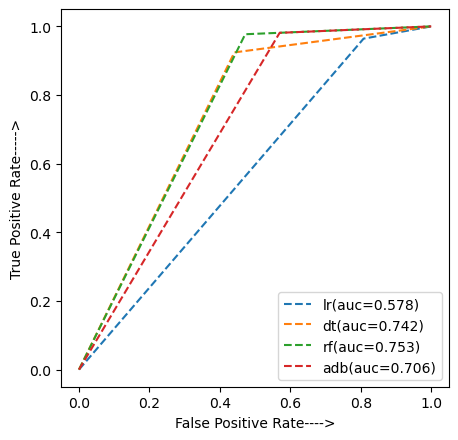

In [989]:
from sklearn.metrics import roc_curve,auc
lr_fpr,lr_tpr,threshold=roc_curve(y_test,lr_ypred,pos_label=True)
auc_lr=auc(lr_fpr,lr_tpr)
dt_fpr,dt_tpr,threshold=roc_curve(y_test,dt_ypred,pos_label=True)
auc_dt=auc(dt_fpr,dt_tpr)
rf_fpr,rf_tpr,threshold=roc_curve(y_test,rf_ypred,pos_label=True)
auc_rf=auc(rf_fpr,rf_tpr)
adb_fpr,adb_tpr,threshold=roc_curve(y_test,adb_ypred,pos_label=True)
auc_adb=auc(adb_fpr,adb_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(lr_fpr,lr_tpr,linestyle='dashed',label='lr(auc=%0.3f)'%auc_lr)
plt.plot(dt_fpr,dt_tpr,linestyle='dashed',label='dt(auc=%0.3f)'%auc_dt)
plt.plot(rf_fpr,rf_tpr,linestyle='dashed',label='rf(auc=%0.3f)'%auc_rf)
plt.plot(adb_fpr,adb_tpr,linestyle='dashed',label='adb(auc=%0.3f)'%auc_adb)
plt.xlabel('False Positive Rate---->')
plt.ylabel('True Positive Rate----->')
plt.legend()
plt.show()

On the basis of ROC AUC CURVE Random Forest is our best model

# K-Fold Cross Validation:

In [990]:
from sklearn.model_selection import KFold, cross_val_score

k_f=KFold(n_splits=4, shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [991]:
print("Mean of Cross validation score for Random Forest model","=>", cross_val_score(rf, x, y, cv=5).mean())

Mean of Cross validation score for Random Forest model => 0.9157998831010083


# Hyperparameter Tuning:

In [992]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=10, stop=80, num=10)]
# Number of features to consider at every split
max_features=['auto', 'sqrt']
# Maximum number of levels in tree
max_depth=[2,4]
# Minimum number of samples required to split a node
min_samples_split=[2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf=[1, 2]
# Method of selecting samples for training each tree
bootstrap=[True, False]

In [993]:
# Create the param grid
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [994]:
rf_model=RandomForestClassifier()

In [995]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=4 )

In [996]:
rf_grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [997]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 41}

# Check Accuracy:

In [998]:
print(f'Train Accuracy-:{rf_grid.score(x_train, y_train):.3f}')
print(f'Test Accuracy-:{rf_grid.score(x_test, y_test):.3f}')

Train Accuracy-:0.895
Test Accuracy-:0.896


# Saving Model:

In [999]:
rf=RandomForestClassifier()
rf.fit(x, y)

RandomForestClassifier()

In [1000]:
import joblib

In [1001]:
joblib.dump(rf, 'model_joblib_rf')

['model_joblib_rf']

In [1002]:
model=joblib.load('model_joblib_rf')